In [8]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
path = r"C:\Users\obafe\Downloads\query_results (1).csv"
df = pd.read_csv(path)

In [10]:
df.head(), 
df.info(),
df.describe(),
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48943 entries, 0 to 48942
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          48943 non-null  int64  
 1   group        48943 non-null  object 
 2   total_spent  48943 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


uid            0
group          0
total_spent    0
dtype: int64

In [11]:
df.describe()

,uid,total_spent
count,4.894300e+04,48943.000000
mean,1.025001e+06,3.382736
std,1.443521e+04,25.674946
min,1.000000e+06,0.000000
25%,1.012506e+06,0.000000
50%,1.024996e+06,0.000000
75%,1.037504e+06,0.000000
max,1.049999e+06,1659.400000


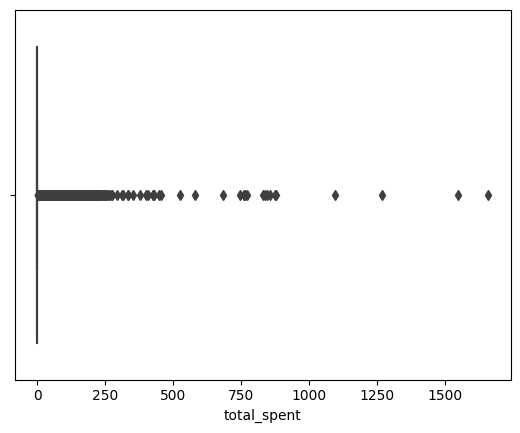

In [12]:
#check for the outliers
# Check for outliers
sns.boxplot(x=df['total_spent'])
plt.show()

### Looks like there are outliers. I will remove the outliers but for now since, I am not sure of what outlier to remove, I will continue with the project.

In [13]:
# Split the data into control and treatment groups
control_group = df.groupby('group').get_group('A')
treatment_group = df.groupby('group').get_group('B')
control_group, treatment_group


(           uid group  total_spent
 2      1018168     A         0.00
 3      1029599     A         0.00
 8      1024055     A       116.08
 9      1004021     A         0.00
 11     1016676     A         0.00
 ...        ...   ...          ...
 48932  1038187     A         0.00
 48933  1048845     A         0.00
 48938  1042801     A         0.00
 48939  1045885     A       102.81
 48940  1045538     A       129.67
 
 [24343 rows x 3 columns],
            uid group  total_spent
 0      1014313     B          0.0
 1      1029532     B          0.0
 4      1025920     B          0.0
 5      1026296     B          0.0
 6      1006164     B          0.0
 ...        ...   ...          ...
 48935  1033944     B          0.0
 48936  1044676     B          0.0
 48937  1044260     B          0.0
 48941  1046699     B          0.0
 48942  1030280     B          0.0
 
 [24600 rows x 3 columns])

In [14]:
#Calculate metrics such as conversion rate, average order value, and total revenue for both the control and treatment groups. 
# Calculate metrics
control_conversion_rate = len(control_group[control_group['total_spent'] > 0]) / len(control_group)
print('The control_conversion_rate is', control_conversion_rate)

treatment_conversion_rate = len(treatment_group[treatment_group['total_spent'] > 0]) / len(treatment_group)
print('The treatment_conversion_rate is', treatment_conversion_rate)

control_avg_order_value = control_group['total_spent'].mean()
print('control_avg_order_value is', control_avg_order_value)

treatment_avg_order_value = treatment_group['total_spent'].mean()
print('treatment_avg_order_value is', treatment_avg_order_value)

control_total_revenue = control_group['total_spent'].sum()
print('control_total_revenue is', control_total_revenue)

treatment_total_revenue = treatment_group['total_spent'].sum()
print('treatment_total_revenue is', treatment_total_revenue)

conversion_rate_diff = treatment_conversion_rate - control_conversion_rate
avg_order_value_diff = treatment_avg_order_value - control_avg_order_value
total_revenue_diff = treatment_total_revenue - control_total_revenue

print('The difference in conversion rates is', conversion_rate_diff)
print('The difference in average order value is', avg_order_value_diff)
print('The difference in total revenue is', total_revenue_diff)

The control_conversion_rate is 0.03923099042845993
The treatment_conversion_rate is 0.04630081300813008
control_avg_order_value is 3.374518467928841
treatment_avg_order_value is 3.3908669458857834
control_total_revenue is 82145.90306479178
treatment_total_revenue is 83415.32686879027
The difference in conversion rates is 0.0070698225796701555
The difference in average order value is 0.016348477956942276
The difference in total revenue is 1269.423803998492


In [15]:
# Calculate percent differences
conversion_rate_diff = (treatment_conversion_rate - control_conversion_rate) * 100
avg_order_value_diff = (treatment_avg_order_value - control_avg_order_value)  * 100


# Print percent differences
print('Conversion Rate Difference: {:.2f}%'.format(conversion_rate_diff))
print('Average Order Value Difference: {:.2f}%'.format(avg_order_value_diff))



Conversion Rate Difference: 0.71%
Average Order Value Difference: 1.63%


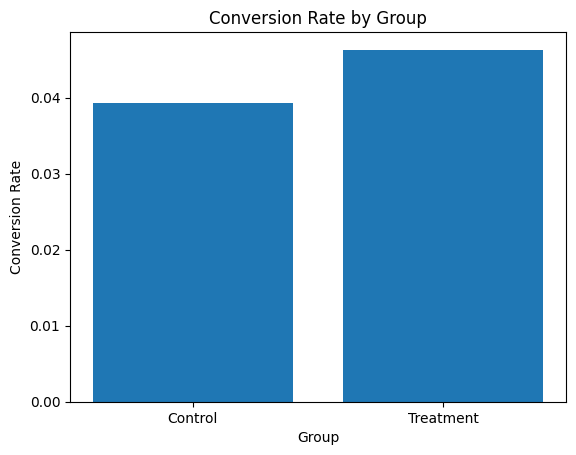

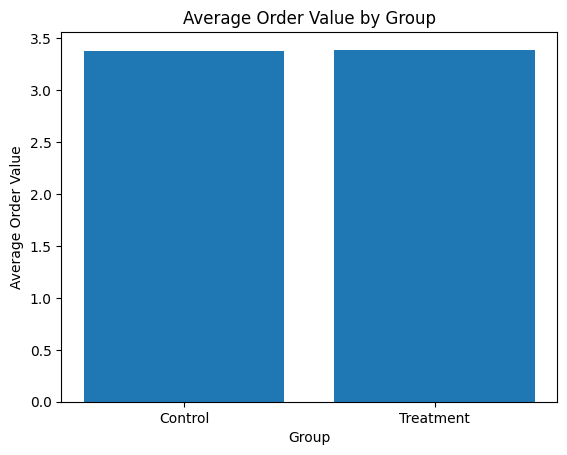

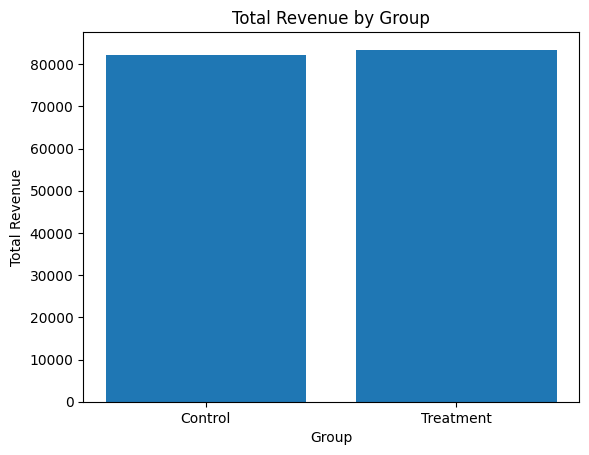

In [16]:
# Visualize results
fig, ax = plt.subplots()
ax.bar(['Control', 'Treatment'], [control_conversion_rate, treatment_conversion_rate])
ax.set_title('Conversion Rate by Group')
ax.set_xlabel('Group')
ax.set_ylabel('Conversion Rate')
plt.show()

fig, ax = plt.subplots()
ax.bar(['Control', 'Treatment'], [control_avg_order_value, treatment_avg_order_value])
ax.set_title('Average Order Value by Group')
ax.set_xlabel('Group')
ax.set_ylabel('Average Order Value')
plt.show()

fig, ax = plt.subplots()
ax.bar(['Control', 'Treatment'], [control_total_revenue, treatment_total_revenue])
ax.set_title('Total Revenue by Group')
ax.set_xlabel('Group')
ax.set_ylabel('Total Revenue')
plt.show()

In [17]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = [[len(control_group[control_group['total_spent'] > 0]), len(control_group[control_group['total_spent'] == 0])],
                     [len(treatment_group[treatment_group['total_spent'] > 0]), len(treatment_group[treatment_group['total_spent'] == 0])]]

# Perform chi-squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

if p_value < 0.05:
    print('The results are statistically significant. The experiment has succeeded.')
else:
    print('The results are not statistically significant. The experiment has failed.')


The results are statistically significant. The experiment has succeeded.


In [18]:
p_value, chi2

(0.0001220580232606619, 14.76062122594858)